In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pip install bar_chart_race

     |████████████████████████████████| 156 kB 6.8 MB/s 


#**Análise Exploratória de Dados**


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JuliaGuerreiro/ICD-Project/main/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
cont = pd.read_csv('https://raw.githubusercontent.com/JuliaGuerreiro/ICD-Project/main/continents2.csv')
cont.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


###**1. Tratamento de Dados**

In [ ]:
anos = df[(df['year'] < 2010) | (df['year'] >= 2016)].index

In [ ]:
df.drop(anos,inplace = True)

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


As seguintes gerações representam pessoas nascidas nos seguintes intervalos de tempo:


1.   Boomers: 1940 a 1960
2.   Generation X: 1960 a 1980
3.   Generation Z: 1995 a 2010
4.   Millenials: 1980 a 1995
5.   Silent: 1925 a 1940



In [ ]:
generations = df[['suicides_no', 'generation']]
generations = generations.groupby('generation').sum()
generations.head()

,suicides_no
generation,
Boomers,286601
Generation X,524165
Generation Z,10760
Millenials,329147
Silent,204496


Aqui excluiremos algumas colunas de nosso dataset com o intuito de focar apenas em dados específicos. Nesse caso, os dados serão: país, ano, sexo, número de suícidios, taxa de suícidio a cada 100k pessoas, IDH, renda per capita e geração (relativa ao intervalo de tempo em que uma determinada pessoa nasceu).

In [ ]:
new_df = df
new_df = new_df.drop(columns=['age', 'population', 'country-year', ' gdp_for_year ($) '])
new_df = new_df.rename(columns={"gdp_per_capita ($)":"GPD", "HDI for year":"HDI", "suicides/100k pop":"suicide_rates"})
new_df.head()

,country,year,sex,suicides_no,suicide_rates,HDI,GPD,generation
252,Albania,2010,male,20,8.27,0.722,4359,Silent
253,Albania,2010,male,20,5.38,0.722,4359,Generation X
254,Albania,2010,male,9,5.01,0.722,4359,Generation X
255,Albania,2010,male,2,3.94,0.722,4359,Silent
256,Albania,2010,male,10,3.58,0.722,4359,Millenials


In [ ]:
continents = cont[['name', 'region']]
continents = continents.rename(columns={'name':'country', 'region':'cont'})
continents

,country,cont
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


###**2. Análise**

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)

**Número de suícidios ao longo dos anos** (período de 2010 a 2015)

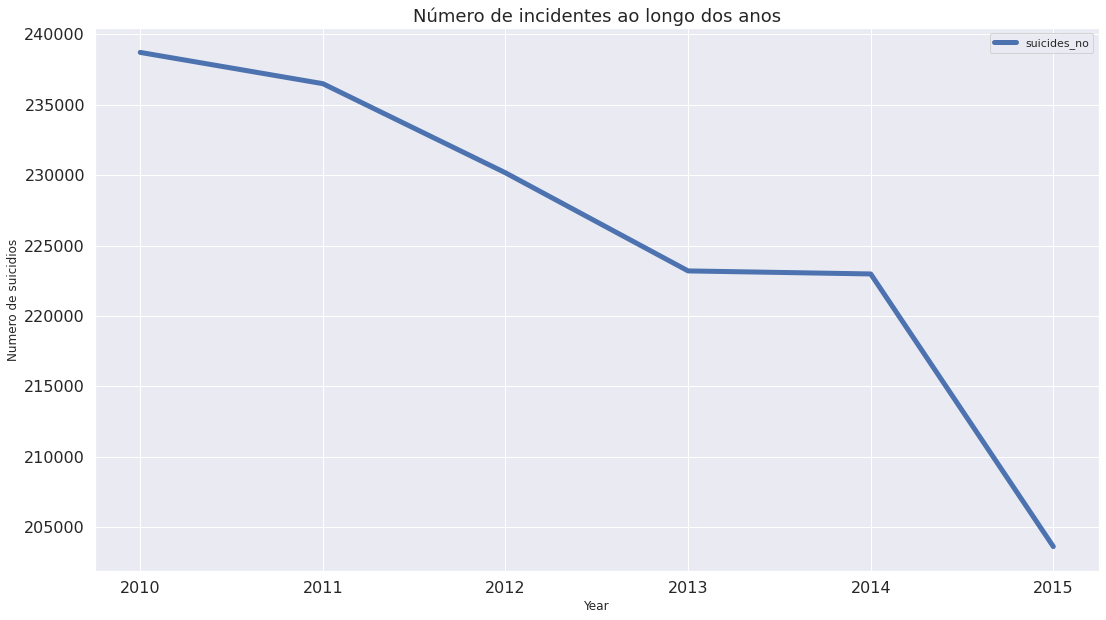

In [ ]:
suicide_per_year = new_df[['country', 'year', 'suicides_no']]
suicide_per_year = suicide_per_year.groupby('year').sum()

suicide_per_year.plot(figsize=(18, 10), fontsize=16, lw=5)
plt.title("Número de incidentes ao longo dos anos", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Numero de suicidios');

Aqui, podemos observar que o número de suícidios decresceu ao longo dos anos, no entanto, devido a escala utilizada, pode-se perceber que o decréscimo não foi tão alto.

**Média da taxa de suícidio ao longo dos anos** (período de 2010 a 2015)

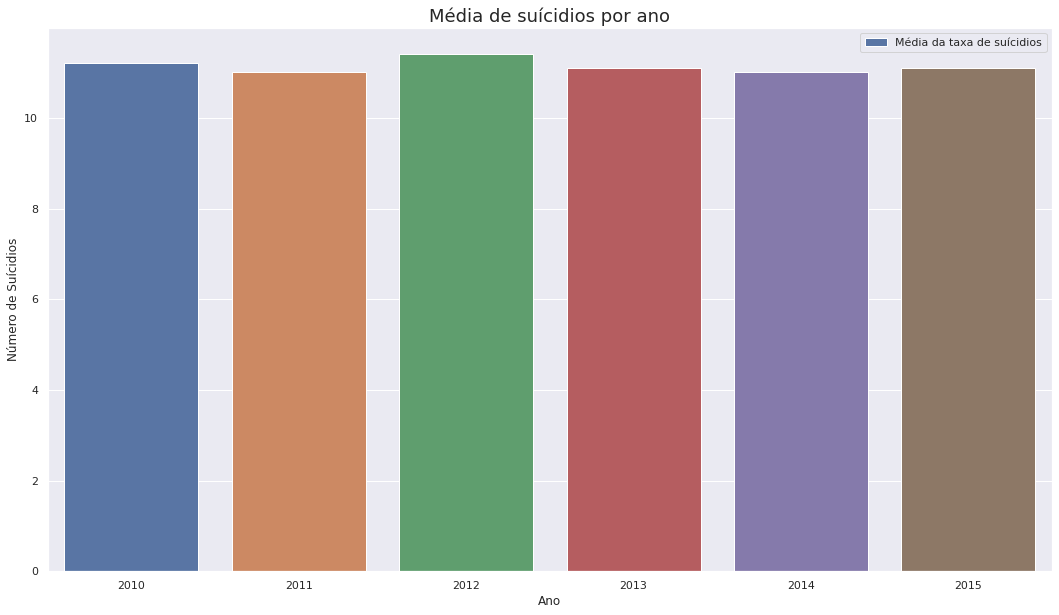

In [ ]:
suicide_rates_per_year = (new_df.groupby('year').agg({'suicide_rates': 'mean', 'suicides_no': 'mean'}).reset_index())
sns.barplot(x='year', y='suicide_rates', data=suicide_rates_per_year, label='Média da taxa de suícidios')

plt.title("Média de suícidios por ano", fontsize=18)
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.legend()
plt.show()

Durante esse período, é possível perceber que a média de casos se manteve estável e sem poucas variações.

**Número de suícidios por sexo ao longo dos anos** (período de 2010 a 2015)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


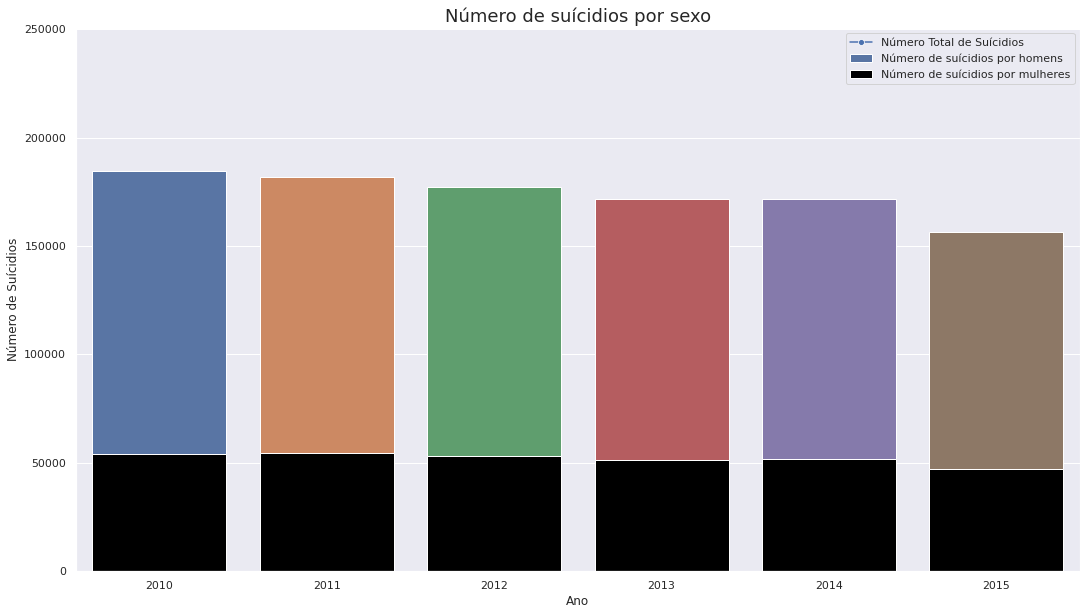

In [ ]:
suicide_per_sex = (new_df.groupby(['sex','year']).agg({'suicides_no': 'sum'}).reset_index())

sex_f = suicide_per_sex['sex'] == 'female'
sex_m = suicide_per_sex['sex'] == 'male'

df_aux1 = suicide_per_sex[sex_f]
df_aux2 = suicide_per_sex[sex_m]

lista1 = [] 
lista2 = []
lista3 = np.zeros(6, dtype=int)

lista1 = df_aux1['suicides_no']
lista2 = df_aux2['suicides_no']

lista1 = lista1.to_numpy()
lista2 = lista2.to_numpy()
lista3 = lista1+lista2

df_aux1['suicide_total'] = lista3

sns.lineplot(x='year', y='suicide_total', marker='o', data=df_aux1, label='Número Total de Suícidios', sort=False)
sns.barplot(x='year', y='suicides_no', data=df_aux2, label='Número de suícidios por homens')
sns.barplot(x='year', y='suicides_no', color="black", data=df_aux1, label='Número de suícidios por mulheres')

plt.title("Número de suícidios por sexo", fontsize=18)
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.legend()
plt.show()

Aqui é possível perceber que o número de suícidos cometidos por homens é muito superior ao número de suícidios cometidos por mulheres. Esse foi um padrão observado em todos os anos analisados.

Text(0.5, 1.0, 'Suícidios por sexo masculino')

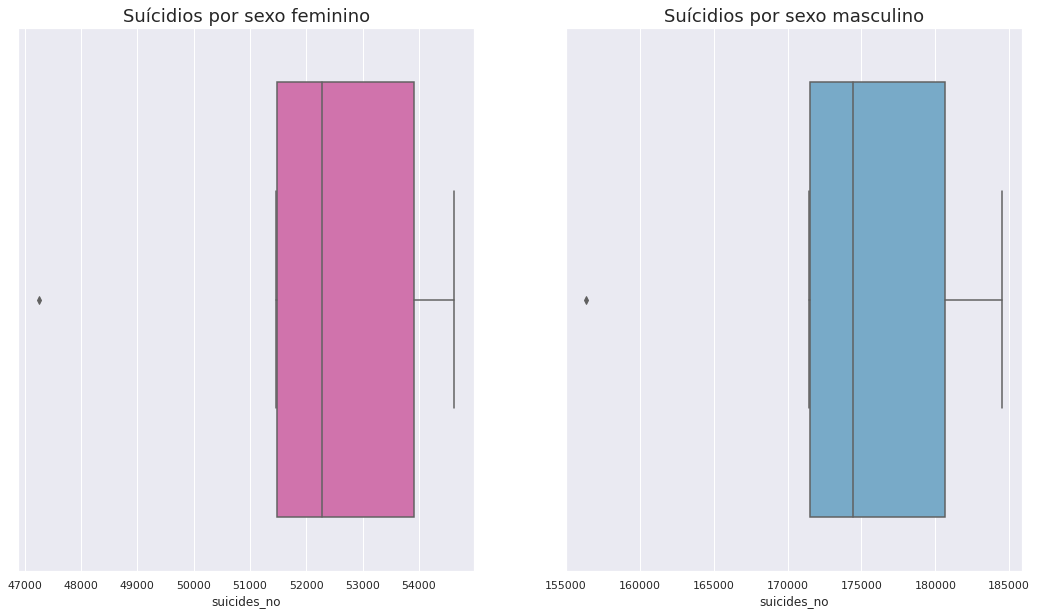

In [ ]:
plt.subplot(1, 2, 1)
spf = sns.boxplot(x=df_aux1["suicides_no"], palette='PuRd')
plt.title("Suícidios por sexo feminino", fontsize=18)

plt.subplot(1, 2, 2)
spf = sns.boxplot(x=df_aux2["suicides_no"], palette='Blues')
plt.title("Suícidios por sexo masculino", fontsize=18)

**Número de suícidios por geração ao longo dos anos (período de 2010 a 2015)**


In [ ]:
suicide_per_generation = (new_df.groupby(['year', 'generation']).agg({'suicides_no': 'sum'}).reset_index())
suicide_per_generation.head()

,year,generation,suicides_no
0,2010,Generation X,125681
1,2010,Generation Z,1760
2,2010,Millenials,27684
3,2010,Silent,83577
4,2011,Boomers,59178


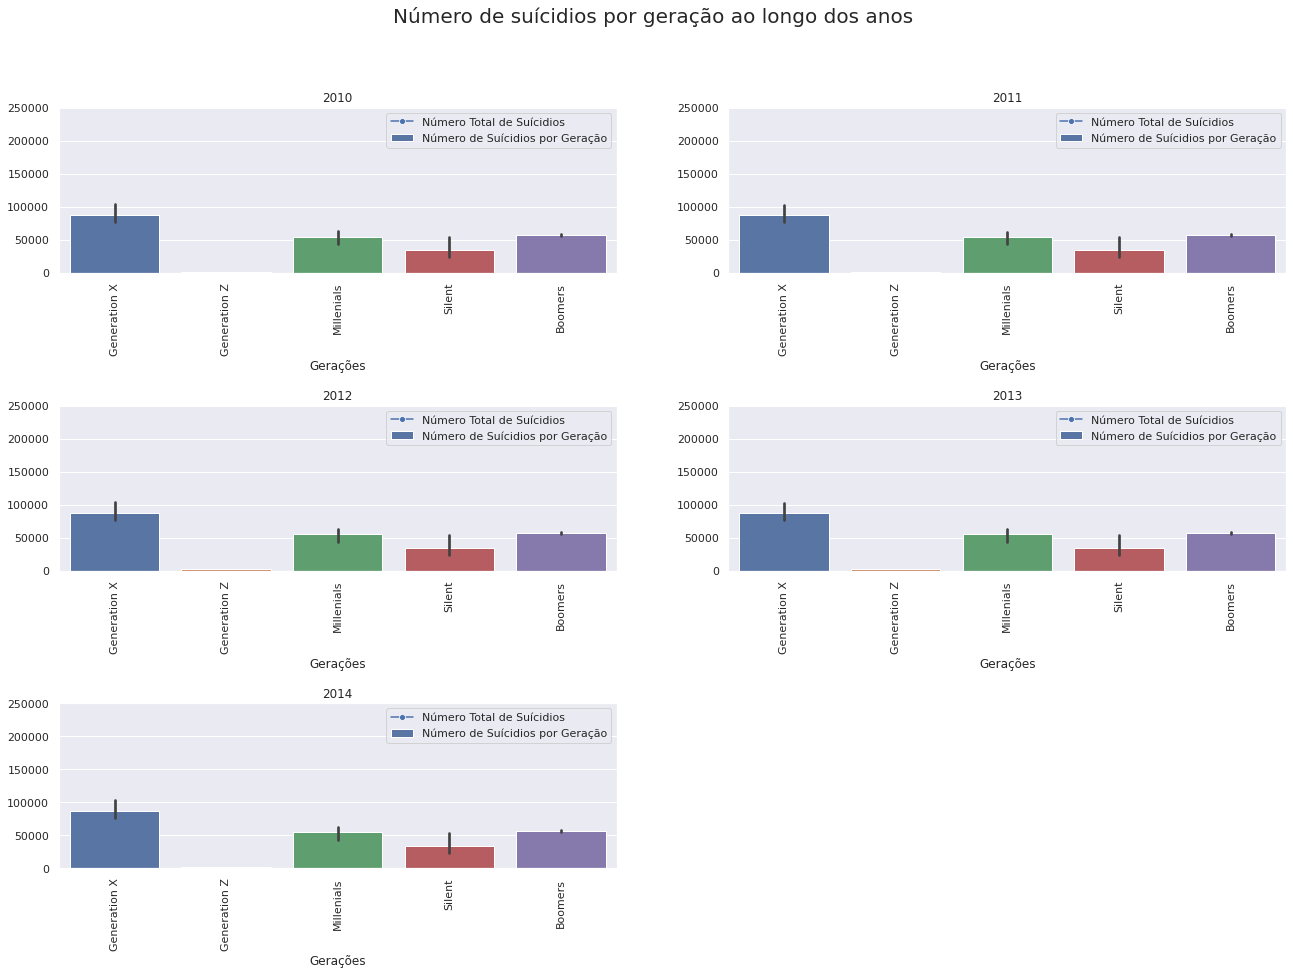

In [ ]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Número de suícidios por geração ao longo dos anos', fontsize=20)

for index, year in enumerate(range(2010, 2015)):
    ax = fig.add_subplot(3,2,index+1)

    sns.lineplot(x='suicides_no', y='suicide_total', marker='o', data=df_aux1, label='Número Total de Suícidios', sort=False)
    sns.barplot(x='generation', y='suicides_no', data=suicide_per_generation, label='Número de Suícidios por Geração')
    
    plt.title(year)
    plt.xlabel('Gerações')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.legend()

**Evolução de casos de suícidios ao longo dos anos** (período de 2010 a 2015)

In [ ]:
rates = (new_df.groupby(['year', 'country']).agg({'suicide_rates': 'mean', 'suicides_no': 'sum'}).reset_index())
rates.head(5)

,year,country,suicide_rates,suicides_no
0,2010,Albania,3.471667,96
1,2010,Argentina,9.270000,2943
2,2010,Armenia,3.367500,73
3,2010,Aruba,4.887500,7
4,2010,Australia,11.053333,2420


In [ ]:
_aux_ = rates['country']
_aux_ = _aux_.tolist()
_aux_

['Albania',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Suriname',
 'Swede

In [ ]:
_aux2_ = continents['country']
_aux2_ = _aux2_.tolist()
_aux2_

['Afghanistan',
 'Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic Of The)',
 'Cook Islands',
 'Costa Rica',
 "Côte D'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuado

In [ ]:
#cria novo dataset com continentes

conts = []

for i in range(len(_aux_)):
  _c = _aux_[i]

  if _c == 'Republic of Korea':
    conts.append('Asia')
  elif _c == 'Russian Federation':
    conts.append('Europe')  
  elif _c == 'Saint Vincent and Grenadines':
    conts.append('Americas')
  else:  
    if _c in _aux2_:
      _aux = continents[continents['country'] == _c]
      a = _aux['cont'].values[0]
      conts.append(a)
    else:
      conts.append('N/A')  

conts


['Europe',
 'Americas',
 'Asia',
 'Americas',
 'Oceania',
 'Europe',
 'Americas',
 'Asia',
 'Americas',
 'Europe',
 'Europe',
 'Americas',
 'Americas',
 'Europe',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Europe',
 'Americas',
 'Asia',
 'Europe',
 'Europe',
 'Americas',
 'Americas',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'Americas',
 'Americas',
 'Americas',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Americas',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Africa',
 'Americas',
 'Europe',
 'Oceania',
 'Americas',
 'Europe',
 'Asia',
 'Americas',
 'Americas',
 'Asia',
 'Europe',
 'Europe',
 'Americas',
 'Asia',
 'Asia',
 'Europe',
 'Europe',
 'Americas',
 'Americas',
 'Europe',
 'Africa',
 'Asia',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'Americas',
 'Europe',
 'Europe',
 'Asia',
 'Americas',
 'Asia',
 'Asia',
 'Europe',
 'Asia',
 'Europe',
 'Americas',
 'Americas',
 'Asia',
 'Americas',
 

In [ ]:
rates['continent'] = conts[:]
rates

,year,country,suicide_rates,suicides_no,presente,continent
0,2010,Albania,3.471667,96,1,Europe
1,2010,Argentina,9.270000,2943,1,Americas
2,2010,Armenia,3.367500,73,1,Asia
3,2010,Aruba,4.887500,7,1,Americas
4,2010,Australia,11.053333,2420,1,Oceania
...,...,...,...,...,...,...
470,2015,Turkmenistan,2.373333,133,1,Asia
471,2015,Ukraine,20.393333,7574,1,Europe
472,2015,United Kingdom,7.228333,4910,1,Europe
473,2015,United States,14.617500,44189,1,Americas


In [ ]:
rates_and_cont = rates[['year', 'suicides_no', 'continent']]
rates_and_cont = (rates_and_cont.groupby(['continent', 'year']).agg({'suicides_no': 'sum'}).reset_index())
rates_and_cont

,continent,year,suicides_no
0,Africa,2010,497
1,Africa,2011,523
2,Africa,2012,605
3,Africa,2013,694
4,Africa,2014,704
5,Africa,2015,593
6,Americas,2010,69289
7,Americas,2011,70843
8,Americas,2012,73068
9,Americas,2013,73607


In [ ]:
#cria novo dataset para analisar evolução de casos

_years = [2010, 2011, 2012, 2013, 2014, 2015]
_continents = ['Americas', 'Asia', 'Africa', 'Europe', 'Oceania']
df1 = pd.DataFrame({'years': _years})

for i in range(len(_continents)):
  _con = _continents[i]
  aux = rates_and_cont[rates_and_cont['continent'] == _con]

  _no = []

  for index in aux.index:
    _aux = aux['suicides_no'].to_numpy()
    _no.append(_aux)

  df1[_con] = _no[:][0]

df1.set_index('years',inplace = True)
df1

,Americas,Asia,Africa,Europe,Oceania
years,,,,,
2010,69289,59350,497,106610,2956
2011,70843,58808,523,103382,2923
2012,73068,52828,605,100498,3161
2013,73607,53278,694,92499,3121
2014,71893,50743,704,96440,2891
2015,73218,46804,593,79998,3027


In [ ]:
import bar_chart_race as bcr

bcr.bar_chart_race(df=df1,filename=None, period_length=1000, title='Evolução de casos de suícidios ao longo dos anos')

Aqui é possível observar que em sua grande maioria, os casos de suícidios ocorrem na Europa, Américas e Ásia. Dentre esses, pode-se observar um rápido crescimento nos números nas Américas e pouca variação nos números da Europa. 
Já na Ásia, os números apresentaram variações ao longo dos anos, mas o continente ainda se manteve com grandes números.

**Análise de HDI e GPD por país ao longo dos anos** (período 2010 a 2015)

In [ ]:
hdi_and_gpd_per_country = (new_df.groupby(['year', 'country']).agg({'GPD': 'mean', 'HDI': 'mean', 'suicides_no': 'sum'}).reset_index())
hdi_and_gpd_per_country.head()

,year,country,GPD,HDI,suicides_no
0,2010,Albania,4359,0.722,96
1,2010,Argentina,11273,0.811,2943
2,2010,Armenia,3460,0.721,73
3,2010,Aruba,25974,NaN,7
4,2010,Australia,54887,0.927,2420


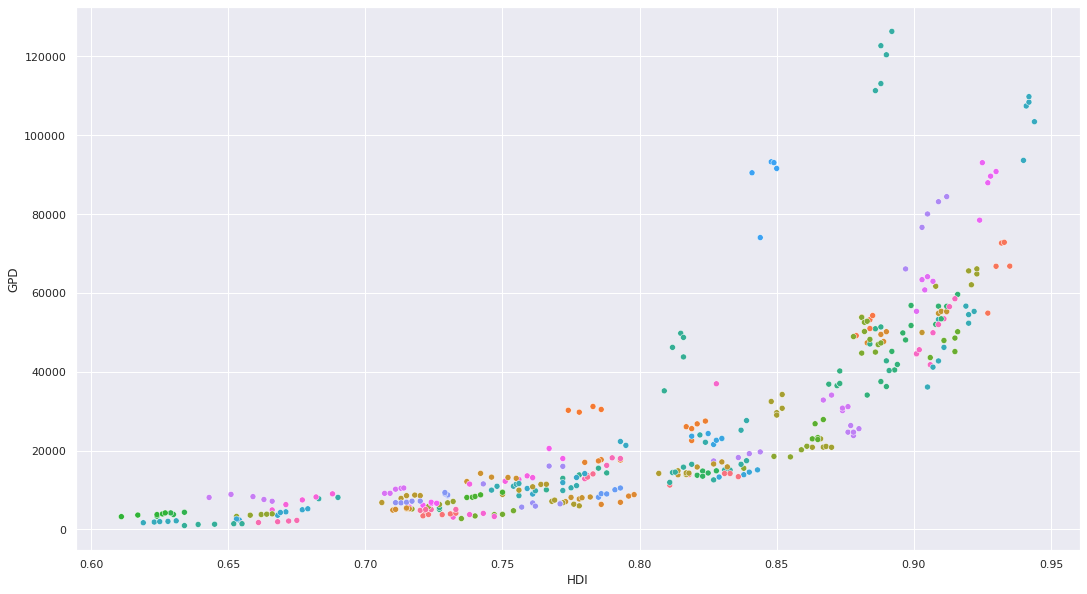

In [ ]:
sns.scatterplot(data=hdi_and_gpd_per_country, x="HDI", y="GPD", hue='country', legend=False, sizes=(20, 2000))
plt.show()

Aqui é possível observar que quanto maior o GDP maior o HDI. Outro ponto interessante é notar que não há muita variação nessas taxas entre os países, tendo em vista que os pontinhos de mesma cor permanecem sempre muito próximos.

**Análise dos 10 países com maiores taxas de suícidio e suas respectivas GPDs**

In [ ]:
top10mais = new_df[['country', 'suicide_rates']]
top10mais = top10mais.groupby(['country']).mean()

In [ ]:
top10mais = top10mais.sort_values(by=['suicide_rates'], ascending=False)
top10mais = top10mais.reset_index()                            

In [ ]:
top10mais_gpd = new_df[['country', 'GPD', 'suicide_rates']]
top10mais_gpd = top10mais_gpd.groupby(['country']).mean()    
top10mais_gpd = top10mais_gpd.reset_index()

In [ ]:
countries = top10mais['country']
countries = countries.tolist()

In [ ]:
rendas=[]
rat = []
r = []
rts = []

for i in range(10):
  df_mask = top10mais_gpd['country'] == countries[i]
  raux = top10mais_gpd[df_mask]
  rendas.append(raux['GPD'].to_numpy())
  rat.append(raux['suicide_rates'].to_numpy())

for i in range(10):
  r.append(rendas[i][0])
  rts.append(rat[i][0])


In [ ]:
renda_10mais = pd.DataFrame({'country': countries[:10], 'gpd': r, 'suicide_rates': rts})
renda_10mais

,country,gpd,suicide_rates
0,Republic of Korea,26367.500000,37.215972
1,Lithuania,15305.500000,33.449444
2,Suriname,9913.600000,31.281000
3,Guyana,3945.750000,30.770000
4,Belarus,7649.750000,24.116042
5,Hungary,14069.833333,23.540694
6,Kazakhstan,13093.833333,23.296806
7,Russian Federation,14217.333333,23.257083
8,Slovenia,24531.333333,22.433194
9,Latvia,14617.000000,21.642222


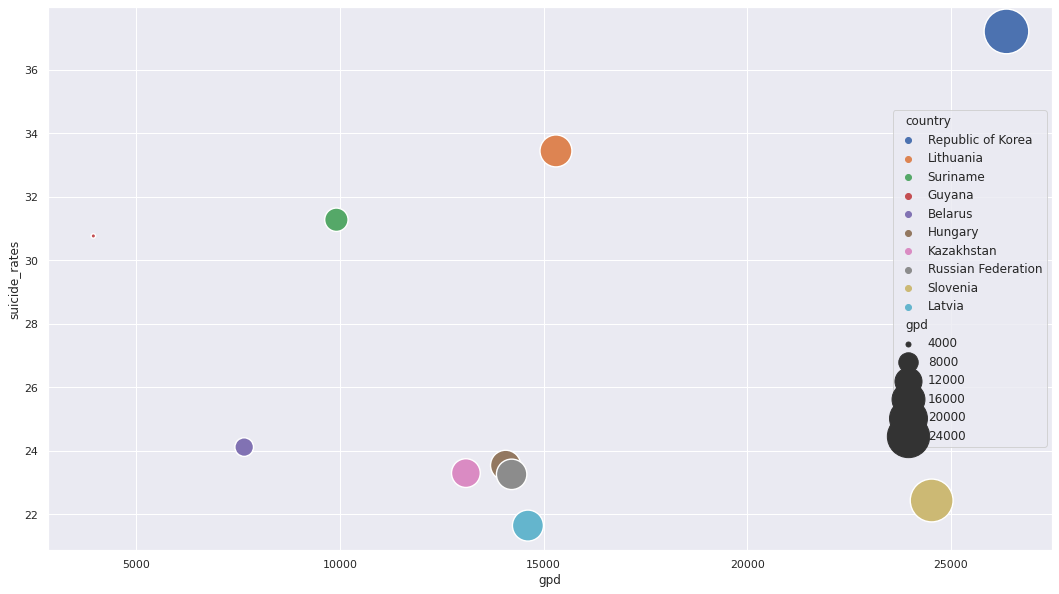

In [ ]:
sns.scatterplot(data=renda_10mais, x="gpd", y="suicide_rates", hue='country', size='gpd', legend=True, sizes=(20, 2000))
plt.show()

Nessa análise é possível observar que dentre os países com maior GPD, aqueles que estão na média possuem menores indíces de suícidio. 

**Análise dos 10 países com menores taxas de suícidio e suas respectivas GPDs**

In [ ]:
top10menos = new_df[['country', 'suicide_rates']]
top10menos = top10menos.groupby(['country']).mean()

top10menos = top10menos.sort_values(by=['suicide_rates'])
top10menos = top10menos.reset_index()     
top10menos

,country,suicide_rates
0,Barbados,0.158750
1,Oman,0.221250
2,Maldives,0.307500
3,Antigua and Barbuda,0.325417
4,Grenada,0.538056
...,...,...
87,Belarus,24.116042
88,Guyana,30.770000
89,Suriname,31.281000
90,Lithuania,33.449444


In [ ]:
top10menos_gpd = new_df[['country', 'GPD', 'suicide_rates']]
top10menos_gpd = top10menos_gpd.groupby(['country']).mean()    
top10menos_gpd = top10menos_gpd.reset_index()
top10menos_gpd

,country,GPD,suicide_rates
0,Albania,4359.000000,3.471667
1,Antigua and Barbuda,13972.500000,0.325417
2,Argentina,13668.166667,9.219861
3,Armenia,3817.500000,3.190694
4,Aruba,26520.000000,6.336250
...,...,...,...
87,United Arab Emirates,36964.000000,1.892500
88,United Kingdom,45602.333333,6.816111
89,United States,56008.166667,13.886111
90,Uruguay,16406.600000,21.492167


In [ ]:
countries2 = top10menos['country']
countries2 = countries2.tolist()

sr = top10menos['suicide_rates']
sr

0      0.158750
1      0.221250
2      0.307500
3      0.325417
4      0.538056
        ...    
87    24.116042
88    30.770000
89    31.281000
90    33.449444
91    37.215972
Name: suicide_rates, Length: 92, dtype: float64

In [ ]:
rendas=[]
rat = []
r = []

for i in range(10):
  df_mask = top10menos_gpd['country'] == countries[i]
  raux = top10menos_gpd[df_mask]
  rendas.append(raux['GPD'].to_numpy())
  rat.append(sr[i])

for i in range(10):
  r.append(rendas[i][0])

In [ ]:
renda_10menos = pd.DataFrame({'country': countries2[:10], 'gpd': r, 'suicide_rates':rat})
renda_10menos

,country,gpd,suicide_rates
0,Barbados,26367.500000,0.158750
1,Oman,15305.500000,0.221250
2,Maldives,9913.600000,0.307500
3,Antigua and Barbuda,3945.750000,0.325417
4,Grenada,7649.750000,0.538056
5,Bahrain,14069.833333,0.742333
6,Kuwait,13093.833333,1.046333
7,South Africa,14217.333333,1.096389
8,Jamaica,24531.333333,1.209167
9,Qatar,14617.000000,1.264028


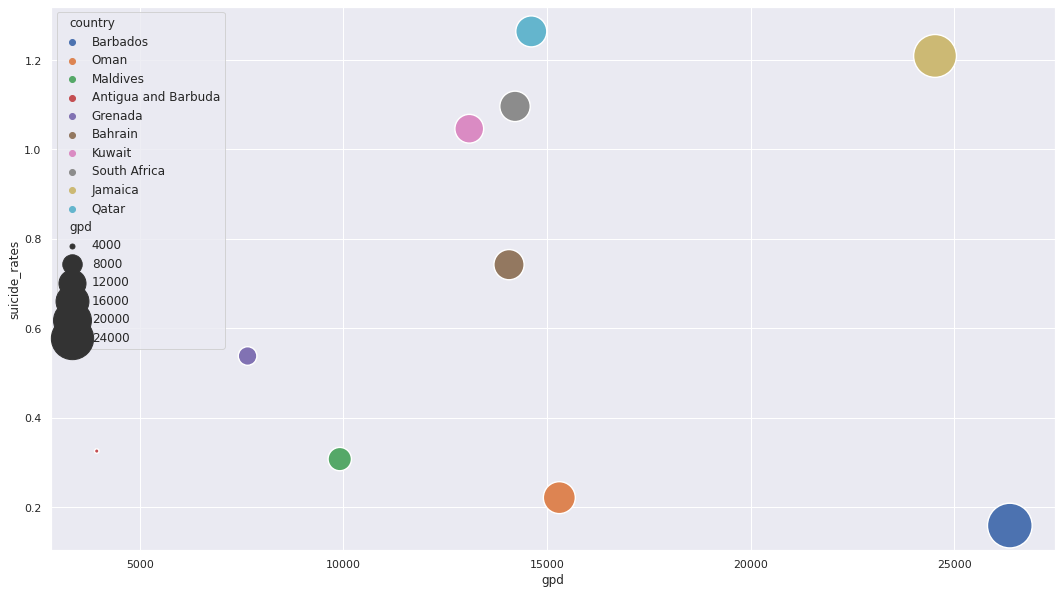

In [ ]:
sns.scatterplot(data=renda_10menos, x="gpd", y="suicide_rates", hue='country', size='gpd', legend=True, sizes=(20, 2000))
plt.show()